In [1]:
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline

from utils import utils, config

In [2]:
df, df_cv = utils.Utils.load_data()
df = df[df["label"] != "neutral"]
df_cv = df_cv[df_cv["label"] != "neutral"]

In [3]:
nltk_rf_w2v_model_1 = utils.CustomPipeline(
    df,
    config.FEATURES,
    config.TARGET, 
    df_cv=df_cv,
    steps=[
        ("preprocessor", ColumnTransformer(
            transformers=[
                (f'nltk_{feature}', Pipeline([
                    ('compound_splitter', utils.CompoundWordSplitter()),
                    ('tokenizer', utils.NLTKTokenizer(extra_stop_words=False, lemmatize=False, remove_urls=False)),
                    ('word2vec', utils.Word2VecTransformer())
                ]), feature) for feature in config.FEATURES]
        )),
        ("classifier", RandomForestClassifier(random_state=config.RANDOM_STATE))
    ],
    model_name="nltk_rf_w2v_1"
)

In [4]:
# nltk_rf_w2v_model_1.fit(False)
# nltk_rf_w2v_model_1.evaluate(False)

[Pipeline] ...... (step 1 of 2) Processing preprocessor, total=  17.2s
[Pipeline] ........ (step 2 of 2) Processing classifier, total=   0.6s
Classification Report for nltk_rf_w2v_1 - balanced train data:
Classification Report - Validation set
               precision    recall  f1-score   support

    negative       0.83      0.96      0.89        74
    positive       0.97      0.85      0.91       102

    accuracy                           0.90       176
   macro avg       0.90      0.91      0.90       176
weighted avg       0.91      0.90      0.90       176

Classification Report - Crossvalidation set
               precision    recall  f1-score   support

    negative       0.49      0.70      0.58       600
    positive       0.74      0.54      0.63       949

    accuracy                           0.61      1549
   macro avg       0.62      0.62      0.60      1549
weighted avg       0.65      0.61      0.61      1549



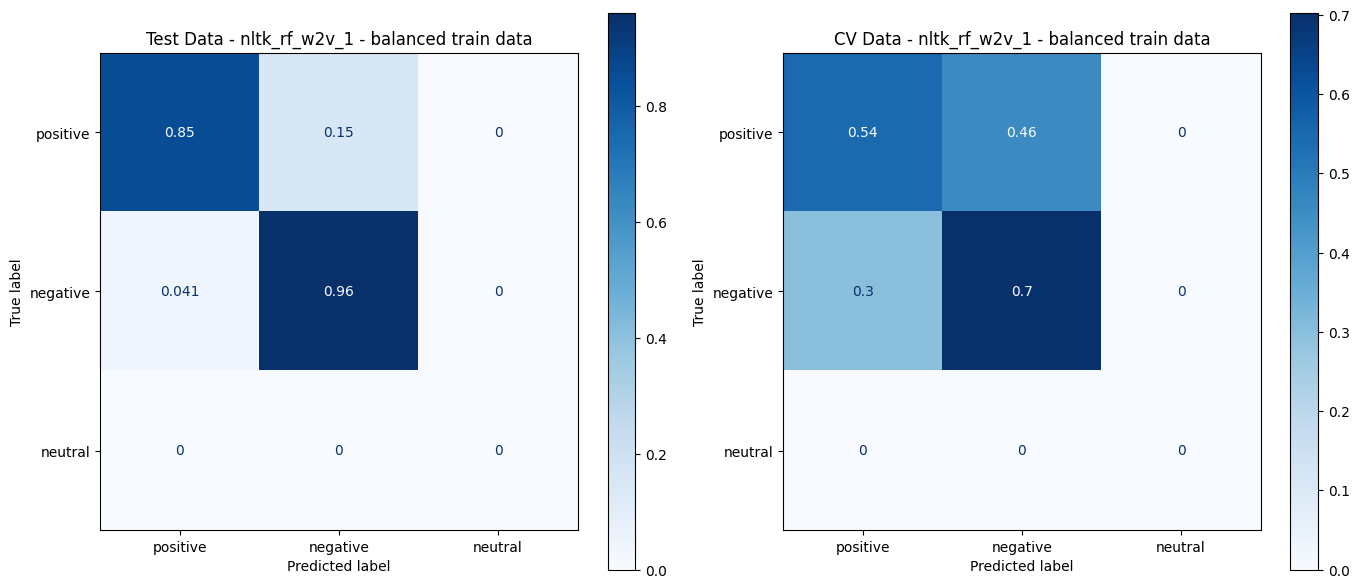

In [5]:
nltk_rf_w2v_model_1.fit(True)
nltk_rf_w2v_model_1.evaluate(True)

In [6]:
nltk_rf_w2v_model_1.dump(config.MODEL_DIR)

In [7]:
nltk_rf_w2v_model_2 = utils.CustomPipeline(
    df,
    config.FEATURES,
    config.TARGET, 
    df_cv=df_cv,
    steps=[
        ("preprocessor", ColumnTransformer(
            transformers=[
                (f'nltk_{feature}', Pipeline([
                    ('compound_splitter', utils.CompoundWordSplitter()),
                    ('tokenizer', utils.NLTKTokenizer(extra_stop_words=True, lemmatize=False, remove_urls=False)),
                    ('word2vec', utils.Word2VecTransformer())
                ]), feature) for feature in config.FEATURES]
        )),
        ("classifier", RandomForestClassifier(random_state=config.RANDOM_STATE))
    ],
    model_name="nltk_rf_w2v_2"
)

In [8]:
# nltk_rf_w2v_model_2.fit(False)
# nltk_rf_w2v_model_2.evaluate(False)

[Pipeline] ...... (step 1 of 2) Processing preprocessor, total=  18.4s
[Pipeline] ........ (step 2 of 2) Processing classifier, total=   0.7s
Classification Report for nltk_rf_w2v_2 - balanced train data:
Classification Report - Validation set
               precision    recall  f1-score   support

    negative       0.84      0.97      0.90        74
    positive       0.98      0.86      0.92       102

    accuracy                           0.91       176
   macro avg       0.91      0.92      0.91       176
weighted avg       0.92      0.91      0.91       176

Classification Report - Crossvalidation set
               precision    recall  f1-score   support

    negative       0.46      0.65      0.54       600
    positive       0.70      0.52      0.59       949

    accuracy                           0.57      1549
   macro avg       0.58      0.58      0.57      1549
weighted avg       0.61      0.57      0.57      1549



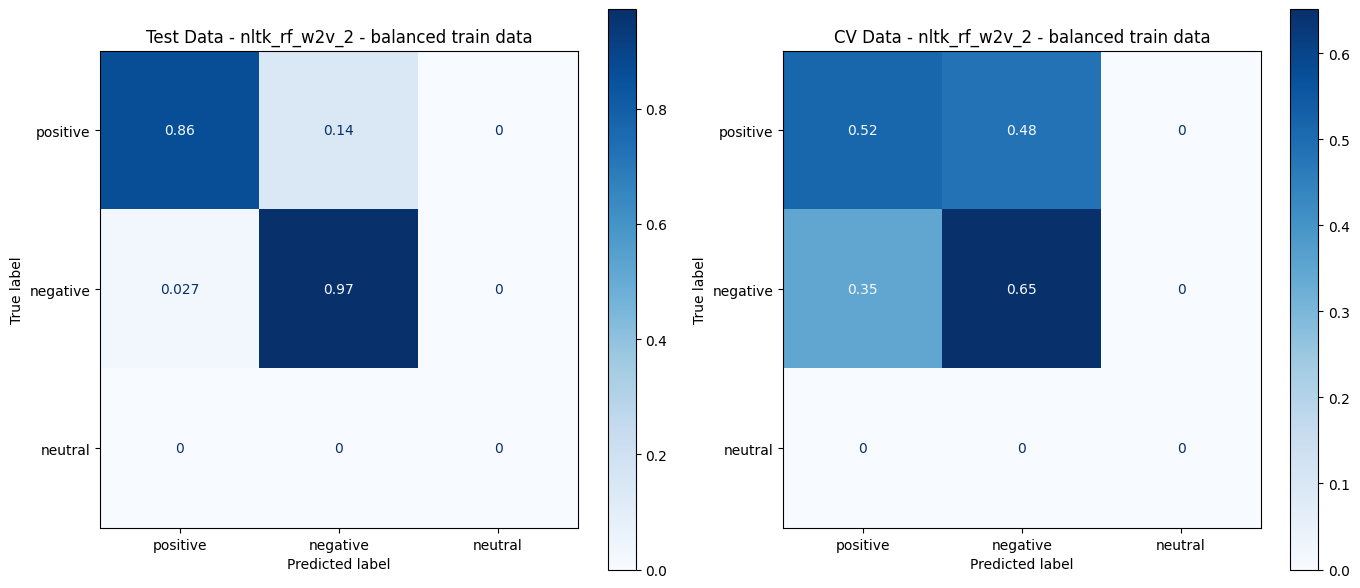

In [9]:
nltk_rf_w2v_model_2.fit(True)
nltk_rf_w2v_model_2.evaluate(True)

In [10]:
nltk_rf_w2v_model_3 = utils.CustomPipeline(
    df,
    config.FEATURES,
    config.TARGET, 
    df_cv=df_cv,
    steps=[
        ("preprocessor", ColumnTransformer(
            transformers=[
                (f'nltk_{feature}', Pipeline([
                    ('compound_splitter', utils.CompoundWordSplitter()),
                    ('tokenizer', utils.NLTKTokenizer(extra_stop_words=True, lemmatize=True, remove_urls=True)),
                    ('word2vec', utils.Word2VecTransformer())
                ]), feature) for feature in config.FEATURES]
        )),
        ("classifier", RandomForestClassifier(random_state=config.RANDOM_STATE))
    ],
    model_name="nltk_rf_w2v_3"
)

In [ ]:
# nltk_rf_w2v_model_3.fit(False)
# nltk_rf_w2v_model_3.evaluate(False)

[Pipeline] ...... (step 1 of 2) Processing preprocessor, total=  27.2s
[Pipeline] ........ (step 2 of 2) Processing classifier, total=   0.6s
Classification Report for nltk_rf_w2v_3 - balanced train data:
Classification Report - Validation set
               precision    recall  f1-score   support

    negative       0.80      0.96      0.87        74
    positive       0.97      0.82      0.89       102

    accuracy                           0.88       176
   macro avg       0.88      0.89      0.88       176
weighted avg       0.89      0.88      0.88       176

Classification Report - Crossvalidation set
               precision    recall  f1-score   support

    negative       0.47      0.69      0.56       600
    positive       0.72      0.50      0.59       949

    accuracy                           0.57      1549
   macro avg       0.59      0.59      0.57      1549
weighted avg       0.62      0.57      0.58      1549



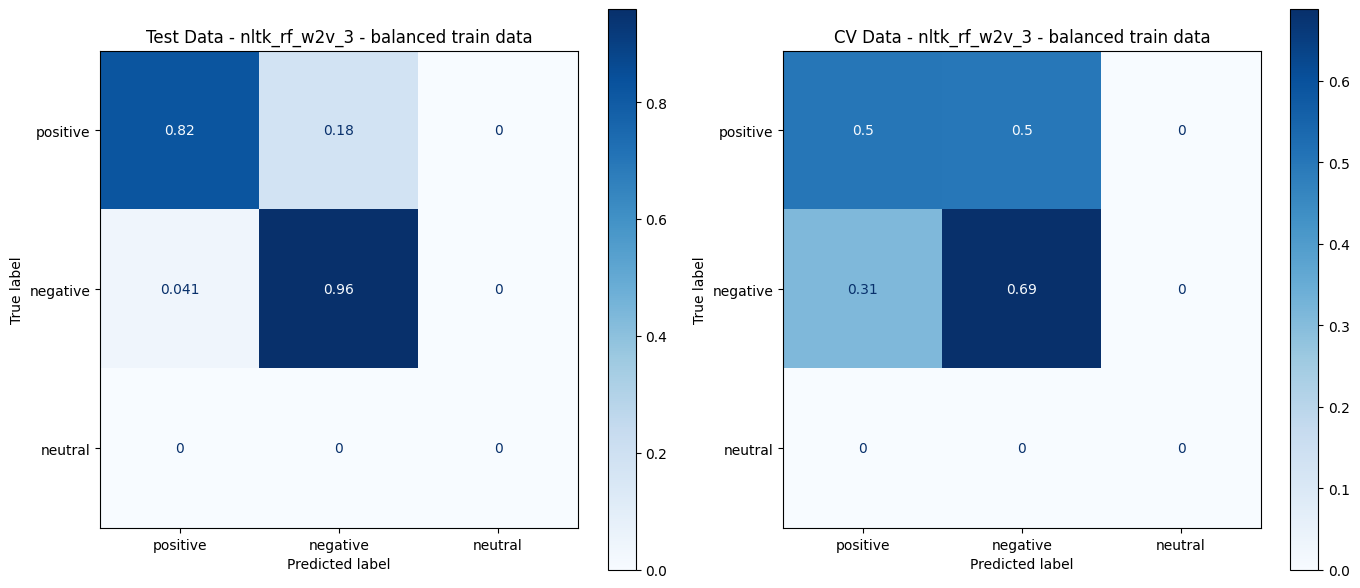

In [12]:
nltk_rf_w2v_model_3.fit(True)
nltk_rf_w2v_model_3.evaluate(True)